# Data Mining Coursework 1

## Aims and Objectives

#### Aim
The aim of this assignment is to apply various data mining techniques to explore, summarise, and visualise multiple datasets, using both statistical and computational methods.The tasks will look through data cleaning, analysis, binning, visualisation, and feature transformation. 

#### Objectives
* **Explore Data:** Load, identify categorical and numerical features, compute frequencies, and create data visualisations to understand feature relationships.
* **Summarize and Group Data:** Calculate univariate and multivariate summaries, group data by categorical variables, and interpret the statistical insights.
* **Perform Data Transformation:** Execute principal component analysis and discuss its effectiveness in distinguishing classes.
* **Implement Data Cleaning and Binning:** Clean datasets by handling missing values and apply binning techniques to simplify data interpretation.
* **Create Data Cubes and Aggregate Results:** Leverage data cube structures for multidimensional data analysis.

### Question 1

The first task looks at the wine dataset using the load_wine function from sklearn.datasets. A DataFrame will be created with the dataset's features and target values. First, the categorical feature in the dataset will be identified and then the frequency of each value of this feature will be computed. Next, for the numerical features, two different univariate summaries and two different multivariate summaries are computed. Then, the observations will be grouped by the categorical feature and the median of each numerical feature is calculated within each group. Lastly, the pair of distinct numerical features with the highest correlation is identified and a scatter plot is created to visualise their relationship.

#### Import Libraries

The libraries used for this question are loaded in the code below.
* **pandas (pd):** Used to create and manipulate the DataFrame from the wine dataset, which allows for easy data handling, computation of frequencies, and other summaries.
*  **numpy (np):** Used to efficiently compute and analyse the correlation matrix to identify the most highly correlated feature pairs.
* **sklearn.datasets.load_wine:** Loads the wine dataset directly into memory, providing both the feature data and target labels for analysis.
* **matplotlib.pyplot (plt):** Essential for plotting, particularly the scatter plot for the two numerical features with the highest correlation.
* **seaborn (sns):** Aids in creating visually appealing and informative plots, especially for statistical summaries, as it builds on matplotlib with advanced styling options.

In [1]:
import pandas as pd
import numpy as np  
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

####  Question 1a

In [3]:
data = load_wine()  # calling the load wine function
df = pd.DataFrame(data.data, columns=data.feature_names) # creating pandas data frame
df['target'] = pd.Series(data.target) #adding the column target for the wine class labels
df  # displying the table

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In the wine dataset in the table above, the **target column** is the only categorical feature. This column represents the type of wine, with each unique value corresponding to a different class label for the wine category. Unlike the other columns, which are continuous features measuring specific chemical properties, the target column contains discrete, non-numeric labels. 

The following code is used to compute the frequency of each value in the categorical feature.

In [5]:
# Identify the categorical feature
categorical_feature = 'target'

# Compute the frequency of each value in the categorical feature
frequency = df[categorical_feature].value_counts(normalize=True) # setting normalize to true gives the proportions

# Display the frequency
print("Frequency of each target category:", frequency)

Frequency of each target category: target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64


The frequency values represent the proportion of each wine type in the dataset:

* Class 0: 33%
* Class 1: 40%
* Class 2: 27%

These values indicate that Class 1 wines are the most common in the dataset, followed by Class 0, and finally Class 2.

####  Question 1b

##### Univariate Summaries

According to (Sandilands, 2014), Univariate analysis involves the examination of a single ("uni") variable ("variate") to provide a summary or description of that variable (Babbie, 2007; Trochim, 2006). 

The two univariate summaries used were the mean and standard deviation. These were chosen as the mean provides a measure of the central tendency of the data. It tells you the average value of the variable, which can give you an idea of what a typical data point looks like.

The standard deviation measures the spread or dispersion of the data points around the mean. It indicates how much the data points deviate from the average value, helping to understand the variability within the dataset.

In [56]:
# 1. Mean of each numerical feature
mean_summary = df.describe().loc['mean']

# 2. Standard deviation of each numerical feature
std_summary = df.describe().loc['std']

print("Mean of each numerical feature:")
print(mean_summary)
print("Standard deviation of each numerical feature:")
print(std_summary)

Mean of each numerical feature:
alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
Name: mean, dtype: float64
Standard deviation of each numerical feature:
alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0

##### Multivariate Summaries 
According to (Stevens, 2023), multivariate analysis encompasses all statistical techniques that are used to analyze more than two variables at once. The aim is to find patterns and correlations between several variables simultaneously.

The two multivariate summaries chosen were the correlation matrix as the correlation matrix provides a comprehensive view of how numerical features are related to each other. The correlation coefficients range from -1 to 1, helping to identify both positive and negative linear relationships.

Pairwise scatter plots offer a visual representation of the relationships between pairs of features, allowing you to see potential patterns, trends, or clusters that may not be evident from numerical summaries alone.

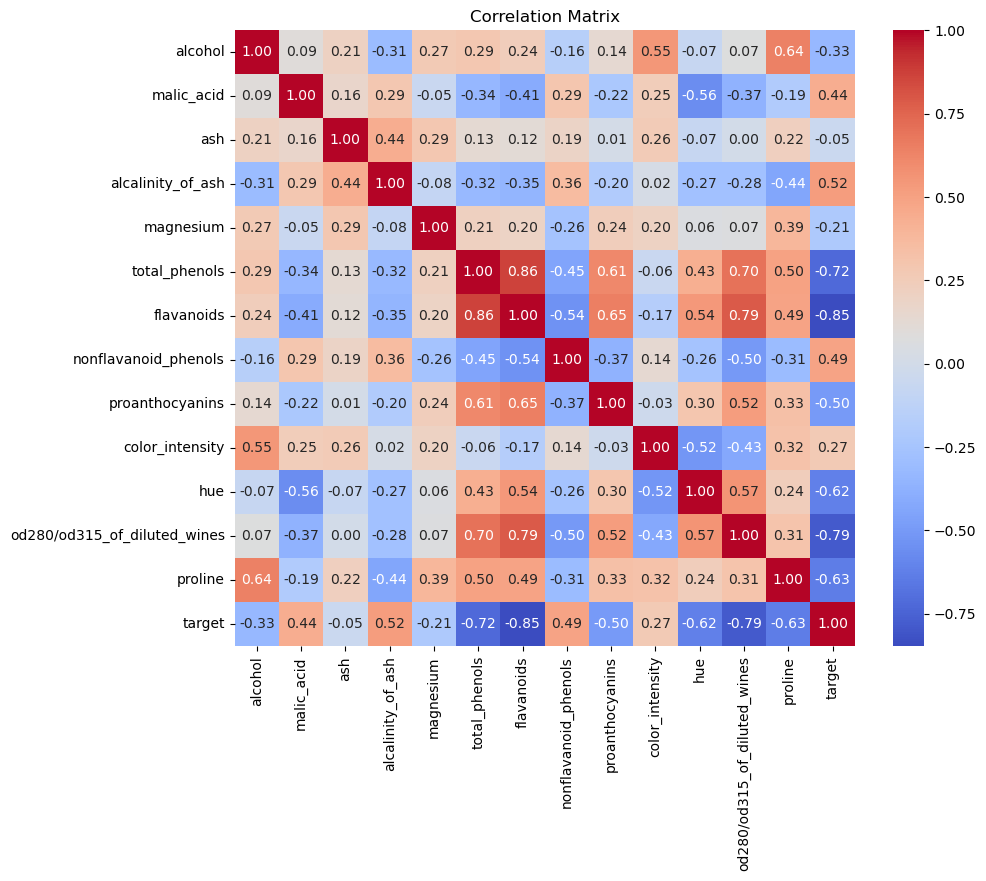

In [70]:
# 1. Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix') 
plt.show()

The correlation matrix above provides insights into the relationships between different features in the wine dataset, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The target variable, representing wine class, shows noticeable correlations with features like flavanoids, od280/od315_of_diluted_wines, and proline, which suggests these features are influential in differentiating wine types. Along with this, the features total_phenols and flavanoids have the highest positive correlation (0.86). This suggests they are highly related and might reflect similar aspects of wine composition, which will be explored further in a scatter plot for visualisation.

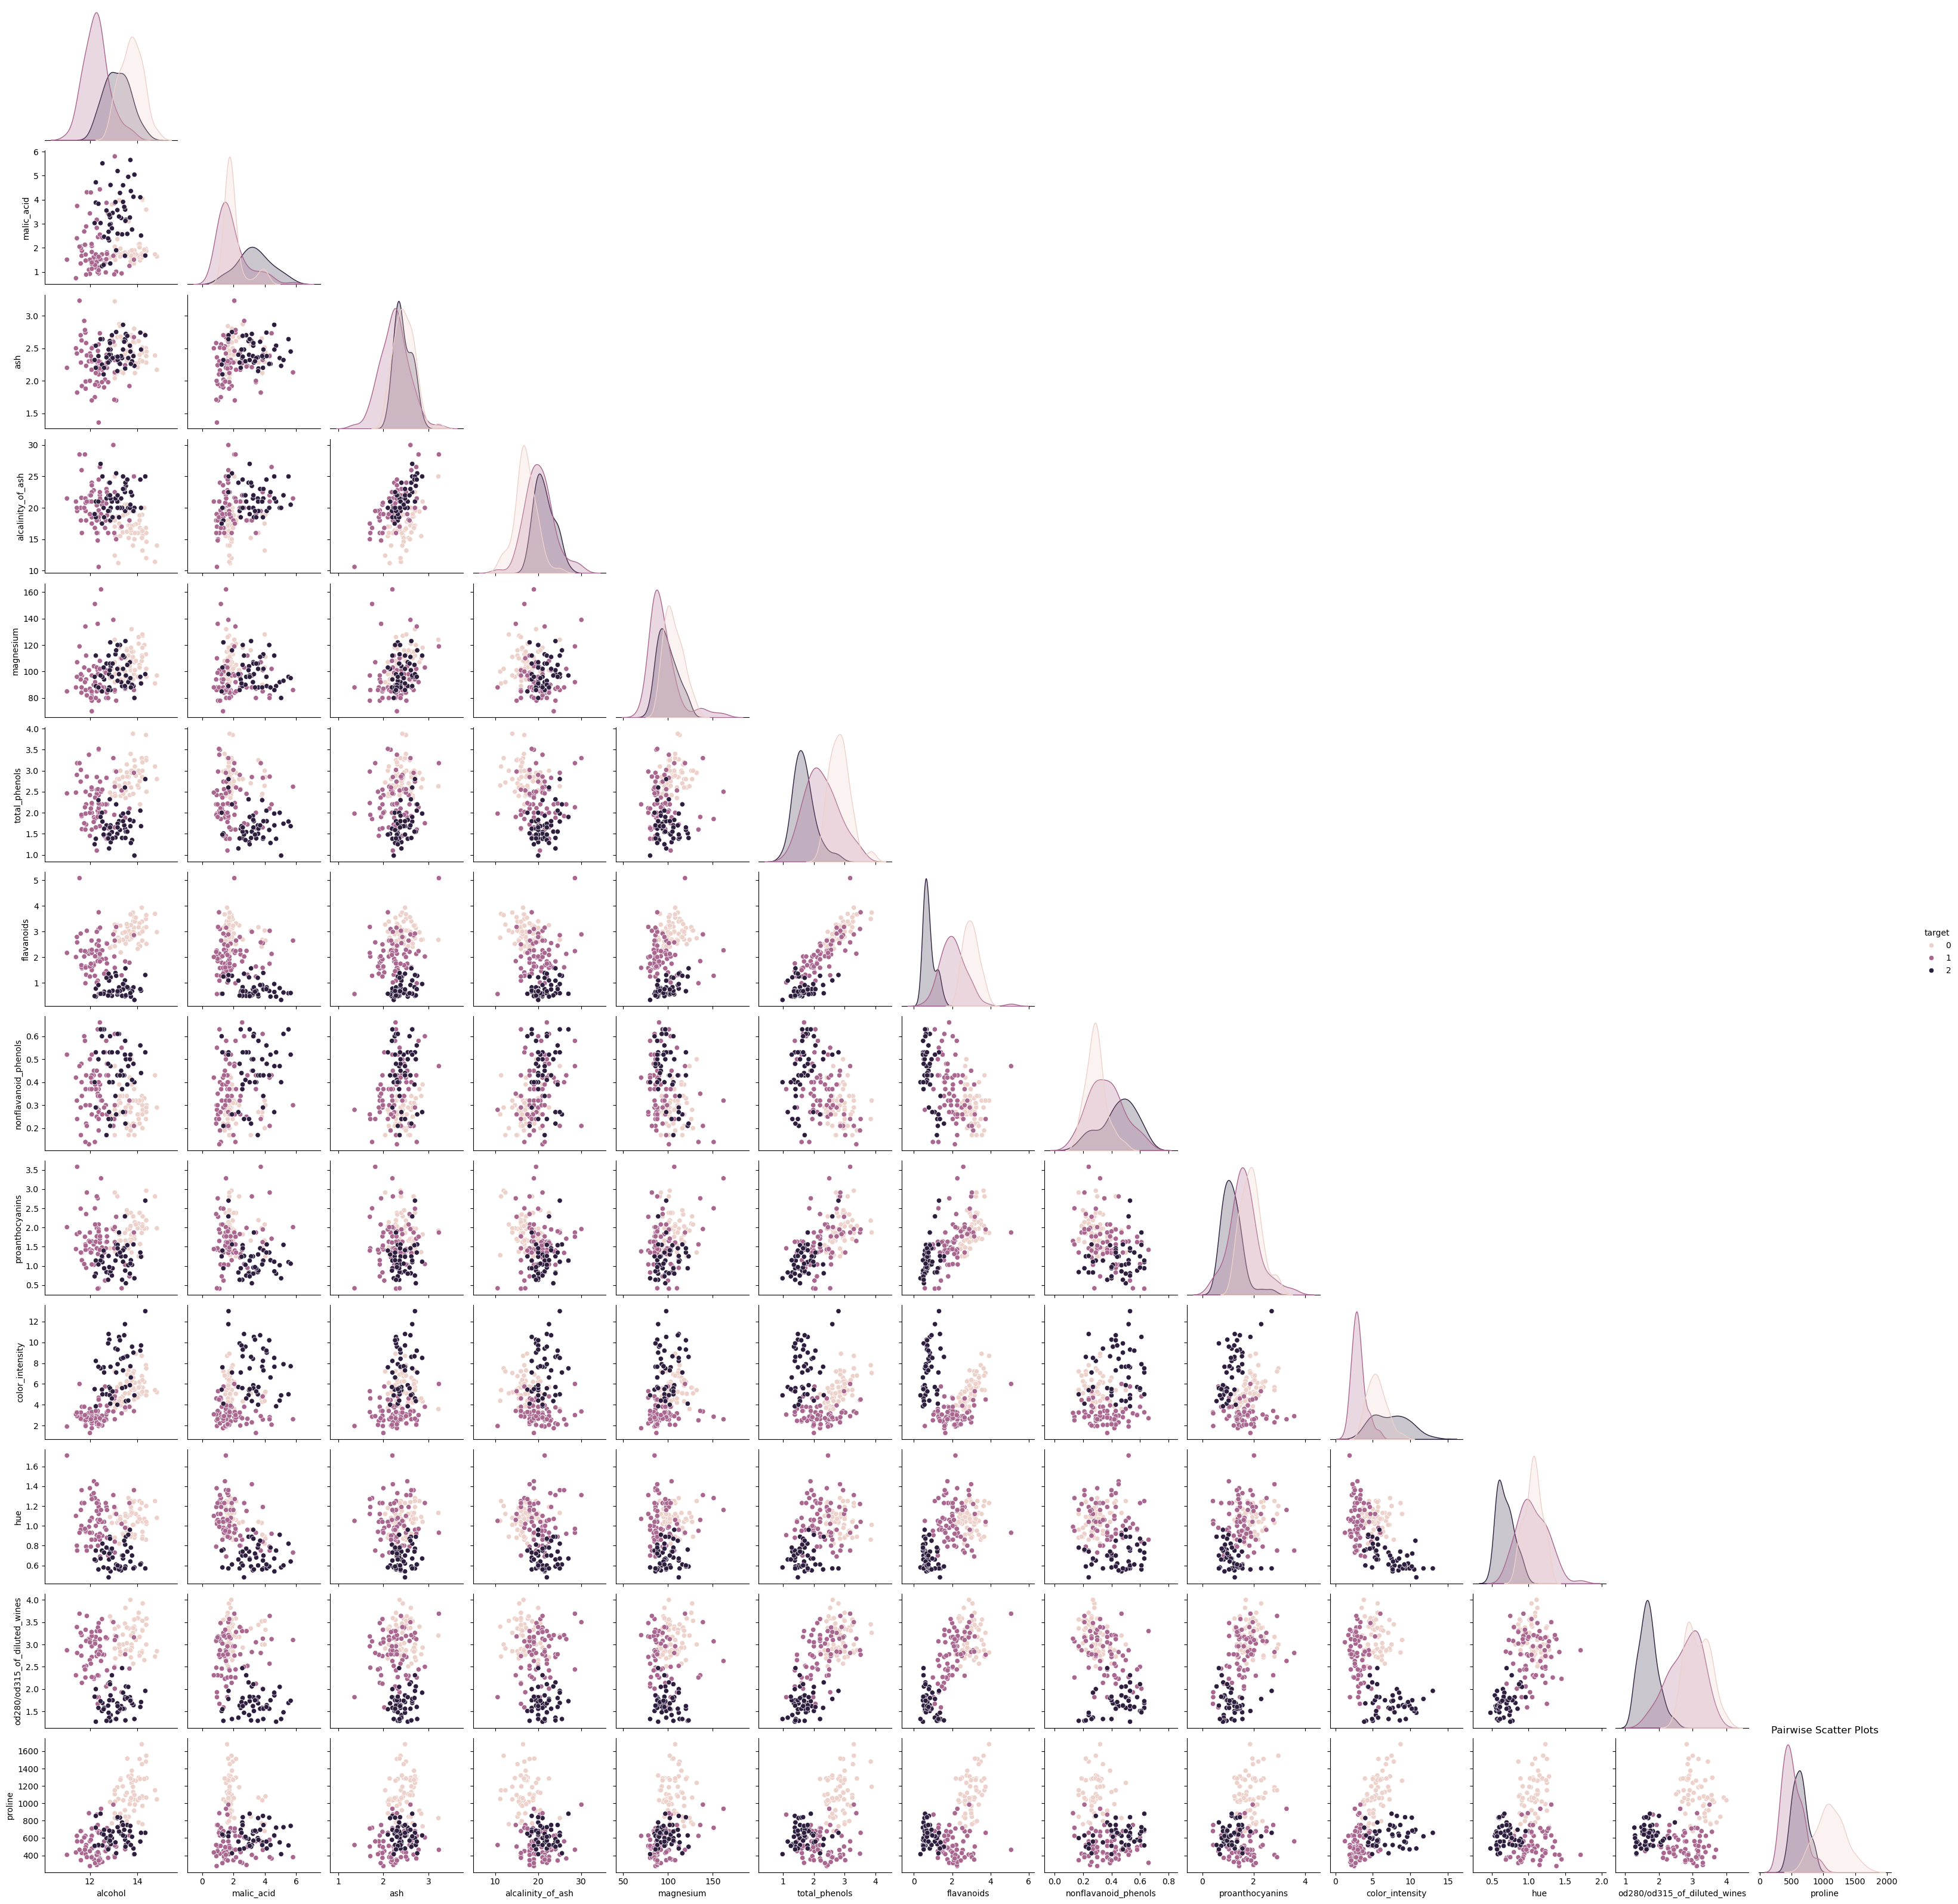

In [67]:
# 2. Pairwise scatter plot of features
sns.pairplot(df, hue='target', corner=True) 
plt.title('Pairwise Scatter Plots') 
plt.show()

The pairwise plot is an invaluable tool for exploratory data analysis, providing insights into the relationships, distributions, and potential anomalies within the dataset. It lays the groundwork for more detailed statistical analysis and model building.

The color gradient in the scatterplots indicates the density of data points, with darker colors representing higher densities. This helps identify the strength and direction of correlations between variables. Strong correlations between variables are often indicated by a linear pattern in the scatterplots. For instance, if two variables show a clear linear trend, it suggests a strong positive or negative correlation.

The diagonal cells show the distribution of each variable individually. These histograms or density plots help understand the spread and central tendencies of the variables. Observing these plots can reveal whether the data for each variable is normally distributed or skewed.

#### Question 1C

To gain deeper insights into how different categories affect numerical features, we grouped the observations by the categorical feature 'target' and computed the median for each remaining numerical feature. The median is a robust measure of central tendency that is less sensitive to outliers compared to the mean.

In [49]:
# Group by the categorical feature 'target' and compute the median for each numerical feature
median_summary = df.groupby('target').median()

# Display the median summary
print("Median of each numerical feature grouped by target:\n", median_summary)


Median of each numerical feature grouped by target:
         alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
target                                                            
0        13.750       1.770  2.44               16.8      104.0   
1        12.290       1.610  2.24               20.0       88.0   
2        13.165       3.265  2.38               21.0       97.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0               2.800       2.980                  0.29            1.870   
1               2.200       2.030                  0.37            1.610   
2               1.635       0.685                  0.47            1.105   

        color_intensity    hue  od280/od315_of_diluted_wines  proline  
target                                                                 
0                  5.40  1.070                          3.17   1095.0  
1             

#### Question 1D
##### Creating a Scatter Plot for the Pair of Numerical Features with the Highest Correlation
A correlation matrix is created which contains the features in the dataset is calculated using df.corr(), which measures the pairwise correlations between the numerical features. The diagonal values, which represent self-correlation, are excluded by setting them to NaN using np.fill_diagonal(). Then, the pair of features with the highest correlation is identified by unstacking the correlation matrix and finding the index of the maximum value. The names of the two features with the highest correlation are extracted and printed. A scatter plot is then created to visualise the correlation.

Highest correlated features: total_phenols and flavanoids


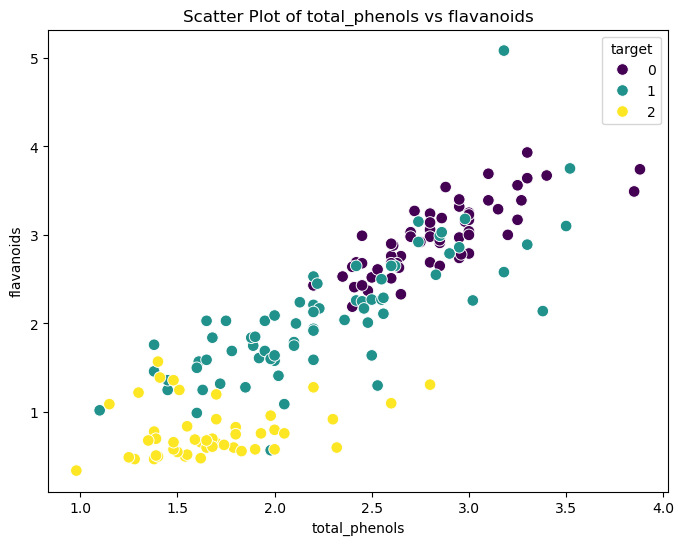

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Mask the diagonal to exclude self-correlation by setting it to NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the pair of features with the highest correlation
highest_corr_pair = correlation_matrix.unstack().idxmax()

# Extract the feature names
feature1, feature2 = highest_corr_pair

print(f"Highest correlated features: {feature1} and {feature2}")

# Create a scatter plot of the highest correlated features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue='target', palette='viridis', edgecolor='w', s=70)
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

The data points are color-coded by the target variable, representing different wine classes:
* Class 0 (purple) appears to have higher values in both total_phenols and flavanoids, clustering in the upper right.
* Class 1 (teal) spans a broad range in the middle but tends to overlap with both Classes 0 and 2.
* Class 2 (yellow) is primarily distributed in the lower left, with lower values for both features compared to Classes 0 and 1.

The scatter plot reveals some separation among the classes based on total_phenols and flavanoids. Class 0 is more distinguishable from Class 2 because it tends to have higher values for both features. However, there is some overlap between Classes 1 and 2 in the mid-range, which may make these two classes less distinguishable from each other just based on these features.

#### Question 2

This question involves applying binning techniques to a given set of sales data to explore different methods of data discretisation. Using equal-frequency binning, the data is divided into bins with equal numbers of observations. Additionally, smoothing by bin boundaries is applied to reduce noise by adjusting values to bin limits. Both binning techniques allow for a simplified view of data distribution and provide a foundation for understanding how binning can aid in data analysis and preprocessing. 

**Sales Data** = [5, 20, 1, 6, 13, 8, 9, 11, 17, 7, 2, 12]

For the sales data above, two binning techniques are used. Equal frequency binning and smoothing by bin boundaries.

##### **Equal Frequency Binning**

In equal-frequency binning, each bin has the same number of data points. Since we have 12 values and want 3 bins, each bin will contain 4 values.
First they are sorted: [1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 17, 20]

Next, they can be divided into three bins: 
* **Bin 1: [1, 2, 5, 6]**
* **Bin 2: [7, 8, 9, 11]**
* **Bin 3: [12, 13, 17, 20]**


##### **Smoothing by Bin Boundaries**

Smoothing by bin boundaries is a technique where we replace the values in each bin with the closest boundary value. The boundary values in each bin are the minimum and maximum of that bin.

For Bin 1: [1, 2, 5, 6]
* Boundary values: 1 (minimum) and 6 (maximum).
* For each value in Bin 1, replace it with either 1 or 6, depending on which is closer:
   * 1 → 1 (closest to 1)
   * 2 → 1 (closer to 1 than 6)
   * 5 → 6 (closer to 6 than 1)
   * 6 → 6 (closest to 6)

Smoothed Bin 1: [1, 1, 6, 6]

For Bin 2: [7, 8, 9, 11]

* Boundary values: 7 (minimum) and 11 (maximum).
* Replace each value with 7 or 11:
   * 7 → 7 (closest to 7)
   * 8 → 7 (closer to 7 than 11)
   * 9 → 7 (closer to 7 than 11)
   * 11 → 11 (closest to 11)
     
Smoothed Bin 2: [7, 7, 7, 11]

For Bin 3: [12, 13, 17, 20]

* Boundary values: 12 (minimum) and 20 (maximum).
* Replace each value with 12 or 20:
   * 12 → 12 (closest to 12)
   * 13 → 12 (closer to 12 than 20)
   * 17 → 20 (closer to 20 than 12)
   * 20 → 20 (closest to 20)
 
Smoothed Bin 3: [12, 12, 20, 20]

**Final Smoothed Data: [1,1,6,6,7,7,7,11,12,12,20,20]**

#### Question 3

The objective of this question is to perform data cleaning on a dataset with income and demographic features by loading it from country-income.csv. The task involves handling missing values by replacing any NaN entries in numerical features with the mean of those features. For categorical features, encoding techniques are applied to convert them to numerical format, enabling consistent data analysis. The final cleaned dataset is displayed, showcasing the effects of these preprocessing steps.


##### Import Libraries
* **pandas:** Used for data manipulation and loading the CSV file into a structured DataFrame.
* **SimpleImputer:** Replaces missing values in numerical features with the mean, ensuring no gaps in data for analysis.
* **OneHotEncoder:** Converts categorical features into binary columns, making them compatible with numerical analysis and machine learning models.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncode

##### Load Data

In [94]:
# Load the CSV file
df = pd.read_csv('country-income.csv')

##### Handle the NAN values
The first line identifies the numerical features in the DataFrame. These are the columns where calculations, such as computing the mean, are feasible. The numerical_features list helps in selectively applying transformations, like imputing missing values, specifically to numerical columns.
Then SimpleImputer is used to fill any missing values in numerical features with the mean value of each feature. This step is crucial because missing values can cause errors in analysis and model training, so they can be replaced with the average of each column. The imputer object is configured with strategy='mean' and applied to each numerical column.

In [99]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])


##### Encode Categorical Features
Categorical columns (typically of object data type) that represent qualitative data are identified, such as country names or income levels. These categorical features are then prepared for encoding because many algorithms expect numerical inputs.
OneHotEncoding is applied to convert categorical variables into a numerical format that retains the meaning of the original categories. Here, drop='first' is used to avoid the "dummy variable trap," where all categories of a feature are encoded, creating potential collinearity issues in models. This encoding transforms each categorical feature into multiple binary columns, where each represents a specific category.
After encoding, a DataFrame called encoded_df is created from the transformed categorical features, assigning column names derived from the original categorical feature names.
The original DataFrame is updated by removing the original categorical columns (as they’re now encoded) and concatenating encoded_df with the DataFrame containing the imputed numerical data. This final DataFrame, df, now has both numerical and encoded categorical features, ready for analysis.

In [101]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Apply OneHotEncoding to categorical features
encoder = OneHotEncoder(sparse_output =False, drop='first')  # drop='first' to avoid dummy variable trap
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns, as they are now represented in encoded_df
df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Display the resulting dataset
print(df.head())


    Age        Income  Region_India  Region_USA  Online Shopper_Yes
0  49.0  86400.000000           1.0         0.0                 0.0
1  32.0  57600.000000           0.0         0.0                 1.0
2  35.0  64800.000000           0.0         1.0                 0.0
3  43.0  73200.000000           0.0         0.0                 0.0
4  45.0  76533.333333           0.0         1.0                 1.0


#### Question 4

In this question, a dataset of shoe size and height measurements is used to investigate the relationship between these variables for male and female subjects. Separate scatter plots are created for each gender to visually assess the correlation between shoe size and height. The Pearson correlation coefficient is computed for each gender group, offering quantitative insight into the strength of these relationships. By analysing the scatter plots and correlation values, patterns can br observed.

##### Import Libraries
* **pandas:** Loads the shoe size and height data from a CSV file into a DataFrame for structured analysis and data manipulation.
* **matplotlib.pyplot:** Creates scatter plots to visualize the relationship between shoe size and height for male and female subjects separately.
* **scipy.stats.pearsonr:** Calculates the Pearson correlation coefficient for each gender group, providing a quantitative measure of the strength and direction of the relationship between shoe size and height.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

##### Load Data

In [105]:
# Load the CSV file
df = pd.read_csv('shoesize.csv')
df.head()  # Displaying the first 5 rows

Index Gender  Size  Height
0      1      F   5.5    60.0
1      2      F   6.0    60.0
2      3      F   7.0    60.0
3      4      F   8.0    60.0
4      5      F   8.0    60.0

##### Seperate Data by Gender
The data frame is filtered based on the 'Gender' column to create female_data and male_data. This separation allows the analysis and visualisation of the relationship between shoe size and height independently for each gender.

In [58]:
female_data = df[df['Gender'] == 'F']
male_data = df[df['Gender'] == 'M']

##### Compute Pearson's Correlation Coefficient

Pearson’s correlation coefficient between shoe size and height for females and males are calculated using pearsonr. This coefficient quantifies the strength and direction of the linear relationship. Finally, both coefficients are printed, providing a numerical insight into how strongly shoe size and height are related for each gender.

In [62]:
# Compute Pearson's correlation coefficient
female_corr, _ = pearsonr(female_data['Size'], female_data['Height'])
male_corr, _ = pearsonr(male_data['Size'], male_data['Height'])

print(f"Pearson's correlation coefficient (Female): {female_corr}")
print(f"Pearson's correlation coefficient (Male): {male_corr}")


Pearson's correlation coefficient (Female): 0.707811941714397
Pearson's correlation coefficient (Male): 0.7677093547300977


##### Plot Scatter Plots
A figure with two subplots is created to display scatter plots for females and males side by side. This layout facilitates easy comparison. In the first subplot, shoe size (x-axis) vs. height (y-axis) is plotted for females, using a purple color for clarity. In the second subplot, the same is plotted for males, using a blue color. The plt.tight_layout() ensures the subplots do not overlap, making the plots easier to read.

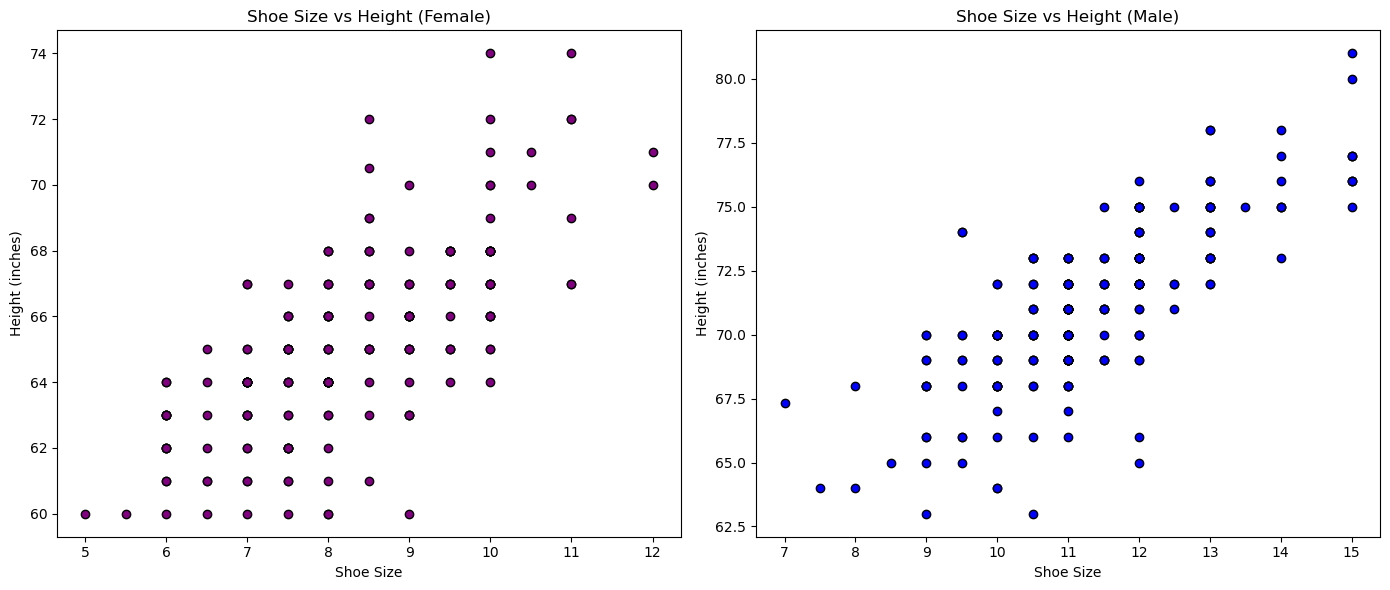

In [67]:
# Plot scatterplots
plt.figure(figsize=(14, 6))

# Scatter plot for females
plt.subplot(1, 2, 1)
plt.scatter(female_data['Size'], female_data['Height'], color='purple', edgecolor='k')
plt.title('Shoe Size vs Height (Female)')
plt.xlabel('Shoe Size')
plt.ylabel('Height (inches)')

# Scatter plot for males
plt.subplot(1, 2, 2)
plt.scatter(male_data['Size'], male_data['Height'], color='blue', edgecolor='k')
plt.title('Shoe Size vs Height (Male)')
plt.xlabel('Shoe Size')
plt.ylabel('Height (inches)')

plt.tight_layout()
plt.show()

Both scatter plots show a positive correlation between shoe size and height for both females and males, with taller individuals generally having larger shoe sizes. The computed Pearson’s correlation coefficients confirm this, with a strong positive correlation for both females (0.7078) and males (0.7677). 

In the male scatter plot, there is a clear upward trend with relatively less spread for each shoe size, particularly at larger sizes, which might explain the higher correlation. The female scatter plot also shows an upward trend, but there’s more variability, especially for shoe sizes in the mid-range. This additional spread might account for the slightly lower correlation coefficient.

The scatter plots give a visual assessment of the relationships, while the Pearson correlation coefficients provide quantitative measures of these relationships. The combination of visual and quantitative analysis offers a comprehensive view of the correlation, helping us understand patterns and potential implications for each gender group.

#### Question 5

This task involves performing Principal Component Analysis (PCA) on the wine dataset to reduce its dimensionality and visualise its class structure. PCA with two components is conducted, and the transformed data is plotted along these principal components, color-coded by the class label (target feature). Observations on whether the classes are visually distinct in the PCA plot are discussed. A standardisation step is also applied to combat any overlap.

##### Import Libraries

* **sklearn.datasets.load_wine:** Loads the wine dataset, which includes features and target labels, for performing PCA and classification analysis.
* **sklearn.decomposition.PCA:** Applies Principal Component Analysis (PCA) with two components to reduce the dataset's dimensionality, allowing for a simplified visualisation of class separability.
* **sklearn.preprocessing.StandardScaler:** Standardises the features to have a mean of zero and unit variance, improving the effectiveness of PCA by aligning feature scales.
* **pandas:** Converts the wine data into a DataFrame for easier manipulation and analysis.
* **matplotlib.pyplot:** Plots the PCA-transformed data to visually assess the distribution and potential overlap between classes.
* **seaborn:** Creates a scatter plot with enhanced aesthetics, color-coding each class in the PCA-transformed data for a clear visual distinction.on.

In [10]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load Data
The load_wine function from sklearn.datasets provides the wine dataset, which contains multiple chemical measurements of wine samples labeled by wine class. The feature data (X) as a DataFrame and the target labels (y), representing the wine classes are extracted.

In [12]:
# Load the wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names) # Feature data as a DataFrame
y = data.target # Target labels (class labels) for the wine types

##### Perform PCA without Standardisation

First PCA is performed without standardisation to visualise the raw data

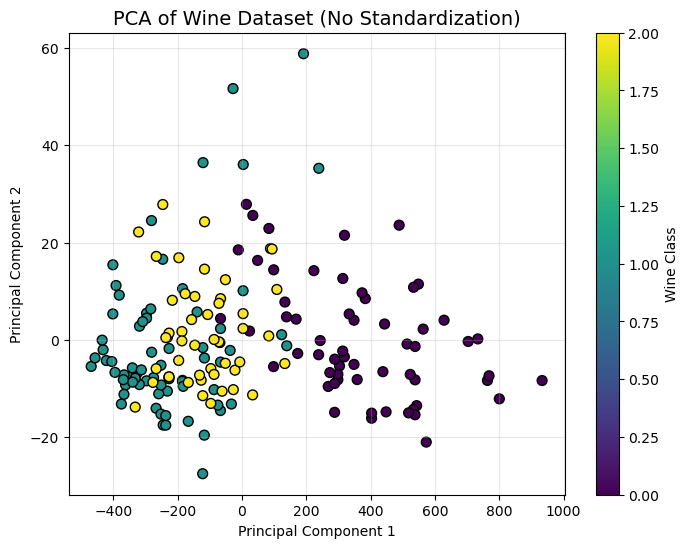

In [14]:
# Initialize PCA
pca = PCA(n_components=2)  # Set the number of components you want

# Perform PCA on raw data (without standardisation)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label="Wine Class")
plt.title("PCA of Wine Dataset (No Standardisation)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

##### Standardise the features
Standardisation centers each feature around zero and scales it to unit variance. This step is crucial for PCA because features with larger variances would otherwise dominate the principal components. StandardScaler ensures that each feature contributes proportionately.

In [18]:
# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Perform PCA With 2 Components
By reducing the dataset to two principal components, it is transformed into a lower-dimensional space while retaining as much of the variance as possible. This step allows to visually explore the relationship between classes in a 2D plot.

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

##### Plot the Scatterplot of the Principal Components
We create a scatter plot of the transformed data with Principal Component 1 and Principal Component 2 as the axes. Each point represents a sample, color-coded by its wine class label (y) using the hue parameter in seaborn.scatterplot. This color-coding helps us visually assess if the classes are separable or if overlap exists in the 2D PCA-transformed space.

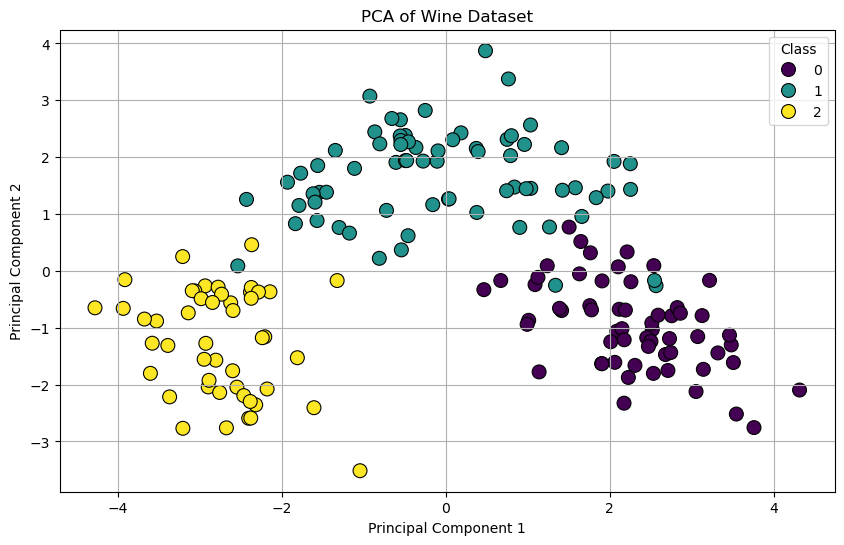

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=100, edgecolor='k')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='best')
plt.grid(True)
plt.show()

From the scatter plot of the principal components for the wine dataset, we can observe the following insights:

* **Class Distinction:**
   * The samples for each class (indicated by colors) are generally separated, but there is some overlap between them. Class 0 (purple) and Class 1 (teal) show some intermingling, while Class 2 (yellow) is more distinct, appearing mainly on the left side of the plot. This partial overlap suggests that, while PCA has successfully captured some class distinction, it hasn’t completely separated all classes.

* **Overlap and Class Similarity:**
  * The overlap, particularly between Class 0 and Class 1, suggests that these classes may share some similar features or that the original features of the data do not perfectly distinguish between them. This overlap could be due to either natural similarities in the data distribution of these classes or insufficient variance along the components that best separate them.

**Pre-PCA Data Processing:**
 * To improve class separation in PCA, additional data preprocessing steps can be taken before performing PCA:
 * Standardisation or Normalisation: Ensuring all features have similar scales can improve PCA effectiveness.
 * Feature Selection or Engineering: Selecting or engineering features that maximize class separability could help PCA capture distinctions.
 * Class-wise Centering or Whitening: Applying class-specific transformations might help if the classes have distinct distributions.

In summary, while PCA has captured some distinctions between classes, additional preprocessing could enhance separation, particularly between similar classes like Class 0 and Class 1.

#### Question 6

This question focuses on the analysis a heatmap of a distance matrix from the graduation_rate.csv dataset, which visualises the relationship between student groups based on parental education levels. Although distance matrices typically contain complex patterns, this heatmap reveals relative distances between students whose parents have different educational backgrounds. 

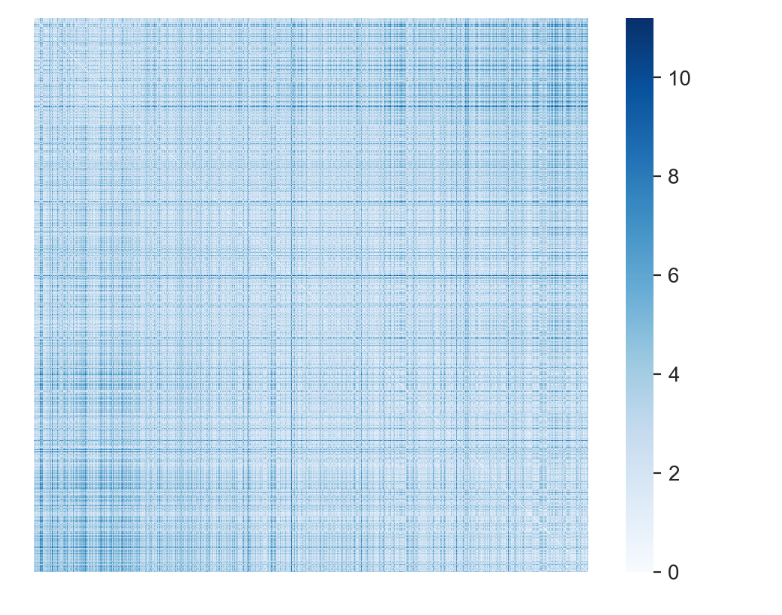
In the heatmap for the distance matrix, the varying intensities of color represent the distance between different points or categories. In this case, the colors indicate the distance (or difference) between students with various parental education levels.

The heatmap shows:
* Darker colors representing higher distances (greater dissimilarity).
* Lighter colors representing lower distances (more similarity).

When comparing students with parents of different education levels, the following relationships can be inferred based on color patterns:

* **Larger Distances:** The regions of darker colors between the rows and columns that correspond to students whose parents have "some high school" education and those with "master's degrees," it indicates a larger distance. This implies greater dissimilarity between these groups.
* **Smaller Distances:** In contrast, if there’s a lighter region among students whose parents only have "some high school" education, it suggests they are more similar to each other than to those with parents holding higher education levels (e.g., master's degree).



#### Question 7

This task involves using the country-income.csv dataset to construct and analyse a data cube, leveraging dimensions such as region, age, and online shopper status, with income as the measure. Using Cubes, a data cube model in JSON format is created, which supports aggregation functions like total, average, minimum, and maximum income. Aggregate results are calculated for the entire dataset and segmented by region, online shopping activity, and individuals aged 40–50. This analysis allows for multidimensional insight into income distributions across various demographic dimensions.

#### 7A

##### Installing Sqlalchemy

The !pip install sqlalchemy==1.3.20 command installs the specified version of the sqlalchemy package, which is required for interacting with relational databases in Python.

Sqlalchemy provides a Python SQL toolkit and Object-Relational Mapping (ORM) library. 

The create_engine function is used to create a connection to the SQLite database.

In [1]:
!pip install sqlalchemy==1.3.20
from sqlalchemy import create_engine

##### Import Libraries
* **cubes.tutorial.sql:** Imports the function create_table_from_csv, which is used to create a table in a database from a CSV file.
* **pandas:** A library for data manipulation, used to load, clean, and manipulate data in DataFrame format.

In [3]:
from cubes.tutorial.sql import create_table_from_csv
import pandas as pd

##### Cleaning the Data
The data first needs to be cleaned to handle the missing values in the Age and Income columns. Therefore the dataset is loaded to Pandas. The missing entries in the Age and Income columns are replaced with the mean of each respective column using the fillna() method. To ensure consistency and accuracy, the Age and Income columns are rounded and converted to integers, as these columns are expected to hold whole-number values. After cleaning the data, the modified DataFrame is saved back to a CSV file (country-income-cleaned.csv) using the to_csv() function. This cleaned version of the data will be used in subsequent steps for further analysis.

In [5]:
# Load the CSV into pandas first
df = pd.read_csv("country-income.csv")

# Handle missing data
# Fill missing 'Age' and 'Income' with the mean of the column
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Replace NaN in 'Age' with the mean value
df["Age"] = df["Age"].round().astype(int)  # Rounding to turn values back into integers
df['Income'] = df['Income'].fillna(df['Income'].mean())
df["Income"] = df["Income"].round().astype(int)

# Save the cleaned dataframe back to a CSV 
df.to_csv('country-income-cleaned.csv', index=True)

#####  Load the Data, Create a Table and Populate 
After cleaning the data, the next step is to transfer the cleaned data into an SQLite database. An SQLite engine is created using the create_engine() function from the sqlalchemy library, which establishes a connection to a local SQLite database file (data.sqlite). Once the connection is made, the create_table_from_csv() function is used to read the cleaned CSV file and create a table within the SQLite database. The table is named country-income-cleaned, and the relevant columns—Region, Age, Income, and Online Shopper—are defined along with their data types (string for Region and Online Shopper, integer for Age and Income). The create_id=True argument ensures that an auto-incrementing ID column is added to the table, uniquely identifying each row. This process prepares the data for further analysis and querying within the database.

In [23]:
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "country-income-cleaned.csv",
                      table_name="Income_Data",
                      fields=[
                          ("Region", "string"),
                          ("Age", "integer"),
                          ("Income", "integer"),
                          ("Online Shopper", "string")],
                      create_id=True
                     )

##### Creating a Data Cube
With the cleaned data now stored in the SQLite database, the next step is to set up a data cube for multidimensional analysis. A data cube is a powerful tool for analysing data across multiple dimensions. Tthe cubes library is used to create a workspace and register the SQLite database as the default data store. The workspace is initialised with the Workspace() function, and the SQLite connection is registered using the register_default_store() method. Afterward, the predefined data model, as shown in Appendix A, stored in a JSON file (data_model.json), is imported using the import_model() function. This model describes the structure of the data cube, including dimensions such as region, age, and online shopper status, with income as the measure. Finally, the workspace.cube("Income_Data") function creates a data cube named Income_Data that will allow for efficient querying and analysis of the data, enabling insights to be drawn from various demographic perspectives.

In [25]:
from cubes import Workspace

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")

workspace.import_model("data_model.json")

cube = workspace.cube("Income_Data")

##### Display Income Model

In [27]:
with open("data_model.json", "r") as json_file:
    loaded_data = json.load(json_file)

loaded_data

{'dimensions': [{'name': 'Region',
   'label': 'Region',
   'attributes': ['Region']},
  {'name': 'Age', 'label': 'Age', 'attributes': ['Age']},
  {'name': 'Online_Shopper',
   'label': 'Online Shopper',
   'attributes': ['Online_Shopper']}],
 'cubes': [{'name': 'Income_Data',
   'dimensions': ['Region', 'Age', 'Online_Shopper'],
   'measures': [{'name': 'Income', 'label': 'Income'}],
   'aggregates': [{'name': 'Income_sum',
     'function': 'sum',
     'measure': 'Income'},
    {'name': 'Income_avg', 'function': 'avg', 'measure': 'Income'},
    {'name': 'Income_min', 'function': 'min', 'measure': 'Income'},
    {'name': 'Income_max', 'function': 'max', 'measure': 'Income'}],
   'mappings': {'Region': 'Region',
    'Age': 'Age',
    'Online_Shopper': 'Online Shopper'}}]}

##### Aggregations and OLAP Operations¶
The code below utilises the browser object to perform aggregation operations on the Income_Data cube, which has been created in the previous steps. First, the browser object is initialised with the workspace.browser(cube) command, allowing for querying and exploration of the data within the cube. 

In [29]:
browser = workspace.browser(cube)

##### 7B(i) - Aggregate Results for the Whole Data Cube
The browser.aggregate() function is then called to compute summary statistics, such as total, average, minimum, and maximum income values, across the entire dataset. These aggregated values are retrieved from the summary attribute of the result object, which stores the computed statistics. Specifically, the code prints the total income (Income_sum), average income (Income_avg), minimum income (Income_min), and maximum income (Income_max), offering a comprehensive summary of the income distribution across all demographic dimensions defined in the cube. This process enables an insightful analysis of the income data from various perspectives.

In [32]:
result = browser.aggregate()
print('The Total Income is: ', result.summary["Income_sum"])
print ('The Average Income is: ', result.summary["Income_avg"])
print('The Minumum Income is:', result.summary["Income_min"])
print('The Maximum Income is:', result.summary["Income_max"])

The Total Income is:  438
The Average Income is:  43.8
The Minumum Income is: 32
The Maximum Income is: 55


##### 7B(ii) - Aggregate Results for Results Per Region
In this code, an aggregation is performed on the data cube to calculate the total, average, minimum and maximum incomes, while drilling down by the Region dimension. The browser.aggregate() function is used with the aggregates parameter specifying the income metrics to calculate and the drilldown parameter indicating that the results should be grouped by region. This means they will be computed separately for each region in the dataset. The results are then iterated over, and for each region, the corresponding total and average income values are printed. This allows for a detailed view of income statistics across different regions, helping to identify regional differences in income.

In [35]:
# Aggregate and drill down by region
result = browser.aggregate(aggregates=["Income_sum", "Income_avg", "Income_min", "Income_max"], drilldown=["Region"])

# Print results per region
print("Results per region:")
for record in result:
    print(f"Region: {record['Region']}")
    print(f"Income Sum: {record['Income_sum']}")
    print(f"Income Avg: {record['Income_avg']}")
    print(f"Income Min: {record['Income_min']}")
    print(f"Income Max: {record['Income_max']}")

Results per region:
Region: 0
Income Sum: 49
Income Avg: 49.0
Income Min: 49
Income Max: 49
Region: 1
Income Sum: 32
Income Avg: 32.0
Income Min: 32
Income Max: 32
Region: 2
Income Sum: 35
Income Avg: 35.0
Income Min: 35
Income Max: 35
Region: 3
Income Sum: 43
Income Avg: 43.0
Income Min: 43
Income Max: 43
Region: 4
Income Sum: 45
Income Avg: 45.0
Income Min: 45
Income Max: 45
Region: 5
Income Sum: 40
Income Avg: 40.0
Income Min: 40
Income Max: 40
Region: 6
Income Sum: 44
Income Avg: 44.0
Income Min: 44
Income Max: 44
Region: 7
Income Sum: 53
Income Avg: 53.0
Income Min: 53
Income Max: 53
Region: 8
Income Sum: 55
Income Avg: 55.0
Income Min: 55
Income Max: 55
Region: 9
Income Sum: 42
Income Avg: 42.0
Income Min: 42
Income Max: 42


##### 7B(iii) - Aggregate Results Per Online Shopping Activity
An aggregation is performed on the data cube to calculate the total, average, minimum and maximum incomes, with the results being drilled down by the Online_Shopper dimension. The browser.aggregate() function is used, where the aggregates parameter specifies the income metrics to be computed, and the drilldown parameter instructs the system to segment the results by whether individuals are online shoppers or not. The results are then printed for each online shopper category, displaying incomes for each group. This approach helps analyse the income differences between online shoppers and non-shoppers, offering insights into the income distribution within these two categories.

In [38]:
# Aggregate and drill down by region
result = browser.aggregate(aggregates=["Income_sum", "Income_avg", "Income_min", "Income_max"], drilldown=["Online_Shopper"])

# Print results per region
print("Results per Online Shopping Activity:")
for record in result:
    print(f"Online Shopping Activity: {record['Online_Shopper']}")
    print(f"Income Sum: {record['Income_sum']}")
    print(f"Income Avg: {record['Income_avg']}")
    print(f"Income Min: {record['Income_min']}")
    print(f"Income Max: {record['Income_max']}")

Results per Online Shopping Activity:
Online Shopping Activity: 57600
Income Sum: 32
Income Avg: 32.0
Income Min: 32
Income Max: 32
Online Shopping Activity: 62400
Income Sum: 44
Income Avg: 44.0
Income Min: 44
Income Max: 44
Online Shopping Activity: 64800
Income Sum: 35
Income Avg: 35.0
Income Min: 35
Income Max: 35
Online Shopping Activity: 69600
Income Sum: 40
Income Avg: 40.0
Income Min: 40
Income Max: 40
Online Shopping Activity: 73200
Income Sum: 43
Income Avg: 43.0
Income Min: 43
Income Max: 43
Online Shopping Activity: 76533
Income Sum: 45
Income Avg: 45.0
Income Min: 45
Income Max: 45
Online Shopping Activity: 80400
Income Sum: 42
Income Avg: 42.0
Income Min: 42
Income Max: 42
Online Shopping Activity: 86400
Income Sum: 49
Income Avg: 49.0
Income Min: 49
Income Max: 49
Online Shopping Activity: 94800
Income Sum: 53
Income Avg: 53.0
Income Min: 53
Income Max: 53
Online Shopping Activity: 99600
Income Sum: 55
Income Avg: 55.0
Income Min: 55
Income Max: 55


##### 7B(iv) - Aggregation  Results for all People Aged Between 40 and 50
In this code, a RangeCut is created for the Age dimension, specifying a range between 40 and 50 years old. This range is used to define a slice of the data cube, represented by a Cell, which filters the data based on this age range. The aggregate() function is then called with the Cell and the aggregates the total, average, minimum and maximum incomes to calculate the incomes for individuals in this age group. The aggregation result is converted into a dictionary for easier access to the computed values, and the incomes for the selected age range are retrieved and printed. This process allows for focused analysis of income within a specific age range, providing insights into the income distribution for individuals between the ages of 40 and 50. 

In [47]:
from cubes import Cell, RangeCut

# Create a RangeCut for the 'Age' dimension between 40 and 50
age_cut = RangeCut("Age", from_path=[40], to_path=[50])  # Range for 'Age' from 40 to 50

# Create a Cell with the specified cuts
cell = Cell(cube, [age_cut])

# Perform the aggregation
result = browser.aggregate(cell, aggregates=["Income_sum", "Income_avg", "Income_min", "Income_max"])

# Convert result to dictionary for easier inspection
result_dict = result.to_dict()


#print(f"Income Sum: {income_sum}, Income Avg: {income_avg}")
income_sum = result_dict['summary'].get('Income_sum', 'N/A')
income_avg = result_dict['summary'].get('Income_avg', 'N/A')
income_min = result_dict['summary'].get('Income_min', 'N/A')
income_max = result_dict['summary'].get('Income_max', 'N/A')

print(f"Results for all People Aged Between 40 and 50")
print(f"Income Sum: {income_sum}")
print(f"Income Avg: {income_avg}")
print(f"Income Min: {income_min}")
print(f"Income Max: {income_max}")

Results for all People Aged Between 40 and 50
Income Sum: None
Income Avg: None
Income Min: None
Income Max: None


#### Question 8

In this final question, a 1-nearest neighbor classifier is applied to a simplified dataset with only two observations and two class labels. The classifier uses Euclidean distance to classify two new observations based on their proximity to the initial points. 

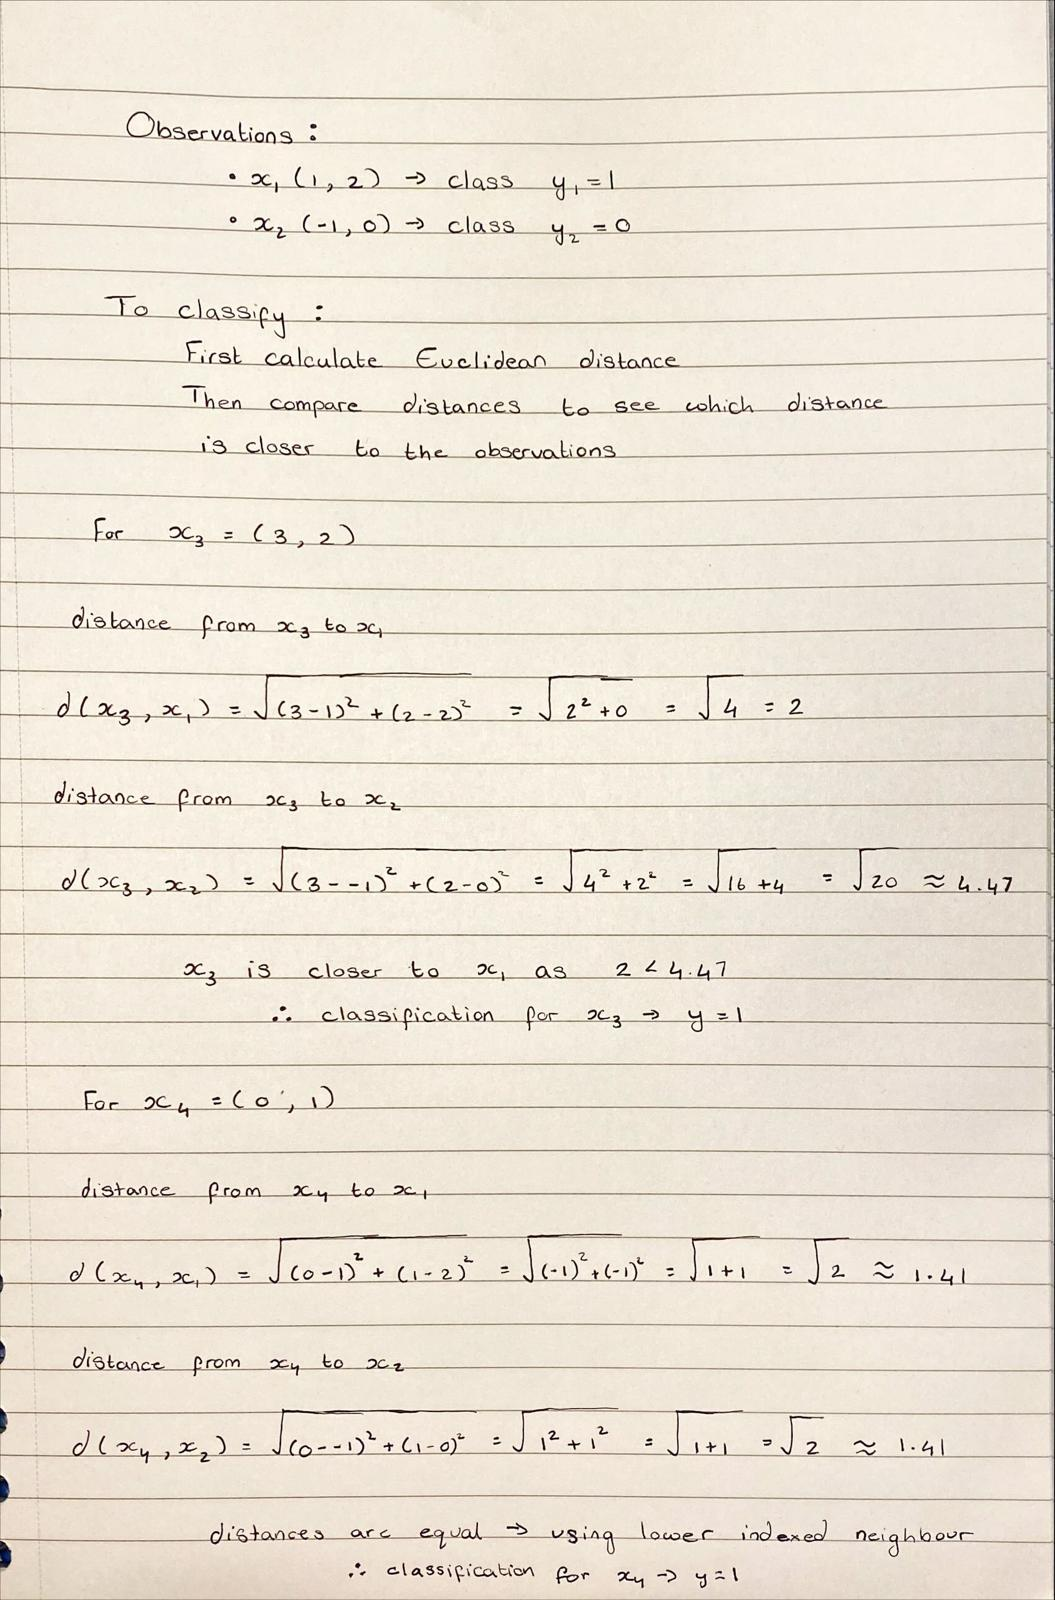

The concept of lower indexed neighbors in classification refers to the nearest neighbors of a test instance that are ranked lower in terms of distance or similarity (Urs Lenz, Bollaert and Cornelis, n.d.). 
As x4 has the same Euclidean distance from both x1 and x2, lower indexed neighbours can be used to classify.

#### Bibliography

Sandilands, D. (2014). Univariate Analysis. Encyclopedia of Quality of Life and Well-Being Research, (1), pp.6815–6817. doi:https://doi.org/10.1007/978-94-007-0753-5_3108.

Stevens, E. (2023). An Introduction to Multivariate Analysis. careerfoundry.com. Available at: https://careerfoundry.com/en/blog/data-analytics/multivariate-analysis/.

Urs Lenz, O., Bollaert, H. and Cornelis, C. (n.d.). A unified weighting framework for evaluating nearest neighbour classification.

#### Appendix A - JSON Data Model

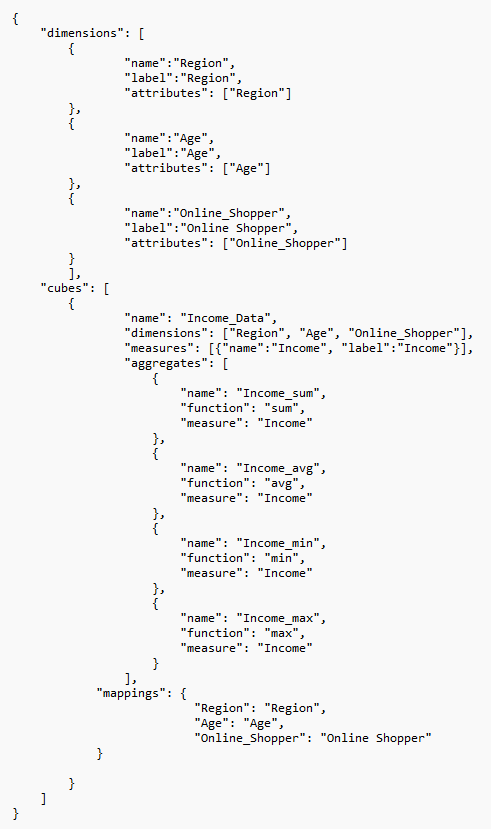